In [1]:
import k3d
import numpy as np
import h5py
from ipywidgets import HBox, VBox
from IPython.display import display, HTML
import matplotlib.pyplot as plt

/home/ngc/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
#fields = h5py.File('MWLMC5_PC01_fields_reconstruction.h5', 'r')
#fields = h5py.File('MWLMC5_PC01_fields_reconstruction.h5', 'r')

In [3]:
fields1 = h5py.File('/home/ngc/Downloads/MWLMC5_PC234_fields_reconstruction_lr.h5', 'r')
fields2 = h5py.File('/home/ngc/Downloads/MWLMC5_PC01_fields_reconstruction_lr.h5', 'r')

In [4]:
#print(np.shape(wake))

Wake is a 3d array with the values of the density in each grid point. The density was computed as follows: 

`
rho03d, rhoall3d, grid = EXP_utils.slice_3d_fields(mwbasis, mwcoefs, time=tt[100],                                                        npoints=100, grid_limits=(-300, 300))`

`np.savetxt('drho_mwlmc5_b0_exp_wake_t_100.txt'.format(i), 
            np.array([rho03d.flatten(), rhoall3d.flatten(), grid[0].flatten()]).T)`
            

In [289]:
rho0_1 = fields1['snap_000']['pot0'][:].reshape((50, 50, 50))
rhoall_1 = fields1['snap_110']['pot'][:].reshape((50, 50, 50)).T
img_1 = (((rho0_1+rhoall_1) / (rho0_1)) - 1) * 7

In [290]:
rho0_2 = fields2['snap_000']['pot0'][:].reshape((50, 50, 50))
rhoall_2 = fields2['snap_110']['pot'][:].reshape((50, 50, 50)).T
img_2 = (((rho0_2+rhoall_2) / (rho0_2)) - 1) * 7

In [313]:
# Contour 1  
def get_volume(level):
    size = np.array([600, 600, 600])
    volume = k3d.volume(
        img_1.astype(np.float32), 
        alpha_coef=level,
        color_range=[-0.4, 0.4], 
        color_map=(np.array(k3d.colormaps.paraview_color_maps.Cool_to_Warm_Extended).reshape(-1,4) 
                   * np.array([1.0,1.0,1.0,1.0])).astype(np.float32)
     )


    volume.opacity_function  = [0.        , 0.        , 0.21327923, 0.98025   , 0.32439035,
           0.        , 0.5       , 0.        , 0.67560965, 0.        ,
           0.74537706, 0.9915    , 1.        , 0.        ]


    volume.transform.bounds = [-size[0]/2,size[0]/2,
                               -size[1]/2,size[1]/2,
                               -size[2]/2,size[2]/2]

    return volume 


volume2 = get_volume(200.0)

volume1.color_range = [-0.2, 0.2]
volume2.color_range = [-0.8, 0.8]

volume3 = get_volume(1.0)
volume4 = get_volume(200.0)

volume3.color_range = [-0.2, 0.2]
volume4.color_range = [-0.4, 0.4]




In [310]:
orbit1 = np.loadtxt("../data/orbits/LMC5_orbit_satellite.txt")
orbit2 = np.loadtxt("../data/orbits/LMC5_orbit_host.txt")

In [311]:
sat_orbit = orbit1[:,:3] - orbit2[:,:3]

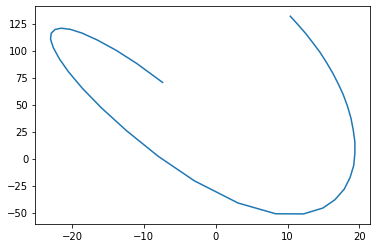

In [294]:
plt.plot(sat_orbit[:40,0], sat_orbit[:40,2])

In [295]:
lines = np.zeros((100, 3))
lines[:,0] = np.arange(0, 100)

plt_streamlines = k3d.line(np.array([sat_orbit[:40,1], sat_orbit[:40,0], sat_orbit[:40,2]]).T, color=0x3f71d8,
                           width=0.00007)

/home/ngc/.local/lib/python3.10/site-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "float64" does not match required type "float32". A coerced copy has been created.
  warnings.warn(


In [314]:
plot1 = k3d.plot(height=800)
plot1 += volume1
#plot += volume2
plot1 += volume2


plot2 = k3d.plot(height=800)
plot2 += volume3
#plot += volume2
plot2 += volume4
plot2 += plt_streamlines


In [315]:
plt_tp_text = k3d.text2d('Potential PC 2-3-4, l=1,2',
                         position=[0.01, 0.05],
                         reference_point='lc',
                         is_html=True,
                         color=0x3f71d8)

In [316]:
#plot += plt_tp_text

In [317]:
plot2.display()



Output()

In [318]:
plot.camera_auto_fit = False
plot.lighting = 1.6

NameError: name 'plot' is not defined

In [302]:
psi_t1 = {}
title_t = {}

psi_t2 = {}


In [303]:
rho0_1 = fields1['snap_000']['pot0'][:].reshape((50, 50, 50))
rho0_2 = fields2['snap_000']['pot0'][:].reshape((50, 50, 50))

for t in range(0, 300, 7):
    rhoall_1 = fields1['snap_{:03d}'.format(t)]['pot'][:].reshape((50, 50, 50)).T
    rhoall_2 = fields2['snap_{:03d}'.format(t)]['pot'][:].reshape((50, 50, 50)).T

    img1 = (((rho0_1+rhoall_1) / (rho0_1)) - 1 ) * 7
    img2 = (((rho0_2+rhoall_2) / (rho0_2)) - 1 ) * 7
    
    psi_t1[str(float(t))] = img1.astype(np.float32)
    psi_t2[str(float(t))] = img2.astype(np.float32)
    #title_t[str(float(t))] = img.astype(np.float32)
    #plt_tp_text.text = "time = {:.2f} Gyr".format(t*.02)
    

In [305]:
volume1.volume = psi_t1
#volume2.volume = psi_t
volume2.volume = psi_t1

volume3.volume = psi_t2
#volume2.volume = psi_t
volume4.volume = psi_t2

In [32]:
# Camera initial position and target
initial_camera_position = (0, 0, 0)  # Replace x1, y1, z1 with initial camera position coordinates
initial_camera_target = (10, 10, 10)  # Replace tx1, ty1, tz1 with initial target coordinates

# Camera final position and target
final_camera_position = (0, 0, 0)  # Replace x2, y2, z2 with final camera position coordinates
final_camera_target = (10, 10, 10)  # Replace tx2, ty2, tz2 with final target coordinates

# Number of animation steps
num_steps = 100

# Calculate the step size for camera position and target
camera_position_step = [(final - initial) / num_steps for initial, final in zip(initial_camera_position, final_camera_position)]
camera_target_step = [(final - initial) / num_steps for initial, final in zip(initial_camera_target, final_camera_target)]

# Animate the camera rotation
for step in range(num_steps + 1):
    # Calculate the new camera position and target for the current step
    camera_position = [initial + step_size * step for initial, step_size in zip(initial_camera_position, camera_position_step)]
    camera_target = [initial + step_size * step for initial, step_size in zip(initial_camera_target, camera_target_step)]

    # Set the camera for the current step
    plot.camera_auto_fit(padding=0.2, position=camera_position, target=camera_target)

    # Display the plot
    display(plot)

    # Optional: Add a short delay to control the animation speed
    time.sleep(0.05)

# Clear the output cell after the animation is done
display(plot)



TypeError: 'bool' object is not callable

In [29]:
plot.start_auto_play()

In [28]:
with open('potential_PC234_l01.html','w') as fp:
    fp.write(plot.get_snapshot())

In [16]:
!pwd

/home/ngc/Work/research/time-dependent-BFE/notebook
